In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-03-03 00:35:52.281418: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 00:35:52.318631: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 00:35:52.318654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 00:35:52.319743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 00:35:52.325566: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 00:35:52.326051: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

In [3]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import classification_report


In [4]:
X_new = pd.read_csv('xtestatt.csv')
y_new = pd.read_csv('ytestatt.csv')

In [5]:
X_new

,src_port,dst_port,protocol,flow_pkts_s,flow_iat_max,bwd_iat_tot,bwd_iat_max,bwd_header_len,bwd_pkts_s,init_bwd_win_byts
0,64329,4255,6,1.816240,0,0,0,20,0.908120,0
1,64329,4980,6,45.920007,0,0,0,20,22.960004,0
2,64329,2379,6,2.004488,0,0,0,20,1.002244,0
3,64329,2242,6,35.864147,0,0,0,20,17.932073,0
4,64329,3330,6,8.286824,0,0,0,20,4.143412,0
...,...,...,...,...,...,...,...,...,...,...
9497,64329,4120,6,61.506289,0,0,0,20,30.753145,0
9498,64329,1153,6,60.034820,0,0,0,20,30.017410,0
9499,64329,3036,6,41.085478,0,0,0,20,20.542739,0
9500,3802,80,6,2.148192,3491862,10434287,3491862,180,0.840597,0


In [6]:
y1 = y_new
le = LabelEncoder()
y_new = le.fit_transform(y_new)

/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
y_new

array([1, 1, 1, ..., 1, 0, 1])

In [8]:
# Print the mapping of labels to digits
print("Label to digit mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

Label to digit mapping:
DdoS: 0
Probe: 1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = X_new.values
X_new = scaler.fit_transform(X_new)

In [10]:
X_new_reshaped = X_new.reshape((X_new.shape[0], 1, X_new.shape[1]))


In [11]:
#model = load_model("binbalancedModel2.keras")
model = load_model("binbalancedModel4.keras")

In [12]:
predictions = model.predict(X_new_reshaped)

297/297 [==============================] - 1s 2ms/step


In [13]:
#convert to categorical
#y_new = to_categorical(y_new,3)

In [14]:
#comparison = np.argmax(predictions,axis=1) == np.argmax(y_new,axis=1)

In [15]:
#accuracy = accuracy_score(y_new, predictions)
#print("accuracy on the new dataset: {:.2f}%".format(accuracy*100))

In [16]:
y_pred = np.round(predictions)

In [17]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [18]:
print(classification_report(y_new, y_pred,zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      4500
           1       0.77      1.00      0.87      5002

    accuracy                           0.85      9502
   macro avg       0.89      0.84      0.84      9502
weighted avg       0.88      0.85      0.84      9502



In [19]:
y_true_encoded = le.fit_transform(y_new)
y_pred_labels = le.fit_transform(y_pred)

/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_new, y_pred)
confusion_mat

array([[3042, 1458],
       [   8, 4994]])

In [21]:
logr_bin_df = pd.DataFrame({'Actual': y_true_encoded, 'Predicted': y_pred_labels})
print(logr_bin_df)

      Actual  Predicted
0          1          1
1          1          1
2          1          1
3          1          1
4          1          1
...      ...        ...
9497       1          1
9498       1          1
9499       1          1
9500       0          1
9501       1          1

[9502 rows x 2 columns]


In [22]:
TP = confusion_mat[0][0]
FP = confusion_mat[0][1] 
FN = confusion_mat[1][0] 
TN = confusion_mat[1][1]
TruePositiveRate = TP/(FN+TP)
FalsePositiveRate = FP/(FP+TN)
print(TruePositiveRate)
print(FalsePositiveRate)

0.9973770491803279
0.2259764414135152


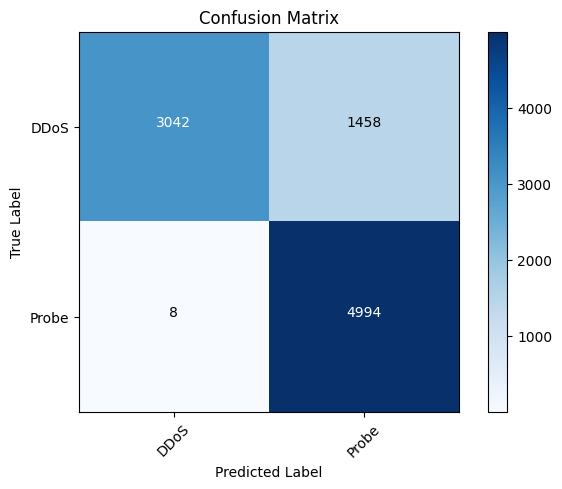

In [23]:
import itertools
def plot_confusion_matrix(conf_matrix, classes, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plot_confusion_matrix(confusion_mat, ['DDoS', 'Probe'], "Confusion Matrix")
plt.show()